In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

# Load the Fraud_Data.csv
fraud_data = pd.read_csv('../data/ffraud_Data.csv')


In [6]:
# Identify categorical columns (if unknown)
categorical_columns_fraud = fraud_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns_fraud)

# Select the categorical columns
categorical_data_fraud = fraud_data[categorical_columns_fraud]


Categorical Columns: ['signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex']


In [7]:
from sklearn.feature_extraction import FeatureHasher

# Initialize the FeatureHasher
hasher = FeatureHasher(n_features=100, input_type='string')  # Choose n_features based on your needs

# Apply feature hashing to categorical columns
hashed_features = hasher.transform(fraud_data[categorical_columns_fraud].astype(str).values)

# Convert to a dense array if needed
hashed_features_dense = hashed_features.toarray()


In [8]:
import pandas as pd

# Load the creditcard.csv dataset
creditcard_data = pd.read_csv('../data/creditcard.csv')


In [9]:
# Identify categorical columns (if unknown)
categorical_columns_credit = creditcard_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display identified categorical columns
print("Categorical Columns:", categorical_columns_credit)

# Select only categorical columns
categorical_data_credit = creditcard_data[categorical_columns_credit]


Categorical Columns: []


In [10]:
# Split data into batches
batch_size = 10000  # Adjust the batch size according to your system memory
num_batches = len(creditcard_data) // batch_size + 1

encoded_batches = []
for i in range(num_batches):
    batch = creditcard_data.iloc[i * batch_size:(i + 1) * batch_size]
    encoded_batch = pd.get_dummies(batch, columns=categorical_columns_credit)
    encoded_batches.append(encoded_batch)

# Concatenate the encoded batches
encoded_creditcard_data = pd.concat(encoded_batches, axis=0)

# Display the shape of the resulting dataset
print(encoded_creditcard_data.shape)


(284807, 31)


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
import pandas as pd

# Assuming creditcard_data is already loaded
# Identify categorical columns (if not already done)
categorical_columns_credit = creditcard_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply one-hot encoding to the categorical columns
encoded_creditcard_data = pd.get_dummies(creditcard_data, columns=categorical_columns_credit)

# Now encoded_creditcard_data exists
# Drop the original categorical columns if not done already
creditcard_data_encoded = encoded_creditcard_data

# Make sure everything is working by printing the head of the dataframe
print(creditcard_data_encoded.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [13]:
# For Creditcard data (separating features and target)
X_creditcard = creditcard_data_encoded.drop(columns=['Class'])  # Exclude target column
y_creditcard = creditcard_data_encoded['Class']  # Target column

# For Fraud data (you'll need to load fraud_data similarly)
X_fraud = fraud_data.drop(columns=['class'])  # Exclude target column
y_fraud = fraud_data['class']  # Target column


In [14]:
# Check the data types of the columns
print(creditcard_data_encoded.dtypes)

# Convert datetime columns to timestamp (assuming 'Date' is the column name)
if 'Date' in creditcard_data_encoded.columns:
    creditcard_data_encoded['Date'] = pd.to_datetime(creditcard_data_encoded['Date']).astype(int) / 10**9  # Convert to seconds since epoch


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [15]:
# Select only numeric columns for normalization
numeric_columns_credit = creditcard_data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Separate features (X) and target (y)
X_creditcard = creditcard_data_encoded[numeric_columns_credit].drop(columns=['Class'])  # Exclude target column
y_creditcard = creditcard_data_encoded['Class']  # Target column

# Similarly, for fraud data
numeric_columns_fraud = fraud_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_fraud = fraud_data[numeric_columns_fraud].drop(columns=['class'])  # Exclude target column
y_fraud = fraud_data['class']  # Target column



In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize Creditcard data
X_creditcard_scaled = scaler.fit_transform(X_creditcard)

# Normalize Fraud data
X_fraud_scaled = scaler.fit_transform(X_fraud)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [17]:
# Combine normalized features with the target column for Creditcard data
creditcard_data_normalized = pd.DataFrame(X_creditcard_scaled, columns=X_creditcard.columns)
creditcard_data_normalized['Class'] = y_creditcard.reset_index(drop=True)

# Combine normalized features with the target column for Fraud data
fraud_data_normalized = pd.DataFrame(X_fraud_scaled, columns=X_fraud.columns)
fraud_data_normalized['class'] = y_fraud.reset_index(drop=True)

# Show the normalized data
print(creditcard_data_normalized.head())
print(fraud_data_normalized.head())


       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27       V28    Amount  Class  
0  0.58

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming creditcard_data_normalized and fraud_data_normalized are already defined

# Feature and target separation for credit card data
X_creditcard = creditcard_data_normalized.drop(columns=['Class'])  # Exclude the target
y_creditcard = creditcard_data_normalized['Class']  # Target variable

# Feature and target separation for fraud data
X_fraud = fraud_data_normalized.drop(columns=['class'])  # Exclude the target
y_fraud = fraud_data_normalized['class']  # Target variable


In [19]:
# Split credit card data into training and testing sets
X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42
)

# Split fraud data into training and testing sets
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42
)

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values for Credit Card Data
imputer_creditcard = SimpleImputer(strategy='mean')  # or 'median', or 'most_frequent' for categorical columns
X_creditcard_train_imputed = imputer_creditcard.fit_transform(X_creditcard_train)
X_creditcard_test_imputed = imputer_creditcard.transform(X_creditcard_test)

# Impute missing values for Fraud Data
imputer_fraud = SimpleImputer(strategy='mean')  # or 'median', or 'most_frequent'
X_fraud_train_imputed = imputer_fraud.fit_transform(X_fraud_train)
X_fraud_test_imputed = imputer_fraud.transform(X_fraud_test)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['lower_bound_ip_address' 'upper_bound_ip_address' 'country']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['lower_bound_ip_address' 'upper_bound_ip_address' 'country']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [36]:
# Logistic Regression for Credit Card Data
logistic_model_creditcard = LogisticRegression(max_iter=1000)
logistic_model_creditcard.fit(X_creditcard_train_imputed, y_creditcard_train)

# Logistic Regression for Fraud Data
logistic_model_fraud = LogisticRegression(max_iter=1000)
logistic_model_fraud.fit(X_fraud_train_imputed, y_fraud_train)

# Predictions for Credit Card Data
y_creditcard_pred = logistic_model_creditcard.predict(X_creditcard_test_imputed)

# Predictions for Fraud Data
y_fraud_pred = logistic_model_fraud.predict(X_fraud_test_imputed)

# Evaluate Credit Card Model
print("Credit Card Data Performance:")
print("Accuracy:", accuracy_score(y_creditcard_test, y_creditcard_pred))
print("Confusion Matrix:\n", confusion_matrix(y_creditcard_test, y_creditcard_pred))
print("Classification Report:\n", classification_report(y_creditcard_test, y_creditcard_pred))

# Evaluate Fraud Model
print("Fraud Data Performance:")
print("Accuracy:", accuracy_score(y_fraud_test, y_fraud_pred))
print("Confusion Matrix:\n", confusion_matrix(y_fraud_test, y_fraud_pred))
print("Classification Report:\n", classification_report(y_fraud_test, y_fraud_pred))


Credit Card Data Performance:
Accuracy: 0.9988764439450862
Confusion Matrix:
 [[56855     9]
 [   55    43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.44      0.57        98

    accuracy                           1.00     56962
   macro avg       0.91      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Data Performance:
Accuracy: 0.9057009562253913
Confusion Matrix:
 [[27373     0]
 [ 2850     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.00      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [38]:
# Fit Decision Tree for Credit Card Data
decision_tree_creditcard = DecisionTreeClassifier(random_state=42)
decision_tree_creditcard.fit(X_creditcard_train_imputed, y_creditcard_train)

# Fit Decision Tree for Fraud Data
decision_tree_fraud = DecisionTreeClassifier(random_state=42)
decision_tree_fraud.fit(X_fraud_train_imputed, y_fraud_train)

# Predictions for Credit Card Data
y_creditcard_pred = decision_tree_creditcard.predict(X_creditcard_test_imputed)

# Predictions for Fraud Data
y_fraud_pred = decision_tree_fraud.predict(X_fraud_test_imputed)


# Evaluate Credit Card Model
print("Credit Card Data Performance:")
print("Accuracy:", accuracy_score(y_creditcard_test, y_creditcard_pred))
print("Confusion Matrix:\n", confusion_matrix(y_creditcard_test, y_creditcard_pred))
print("Classification Report:\n", classification_report(y_creditcard_test, y_creditcard_pred))

# Evaluate Fraud Model
print("Fraud Data Performance:")
print("Accuracy:", accuracy_score(y_fraud_test, y_fraud_pred))
print("Confusion Matrix:\n", confusion_matrix(y_fraud_test, y_fraud_pred))
print("Classification Report:\n", classification_report(y_fraud_test, y_fraud_pred))


Credit Card Data Performance:
Accuracy: 0.9990519995786665
Confusion Matrix:
 [[56830    34]
 [   20    78]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Data Performance:
Accuracy: 0.8934586242265824
Confusion Matrix:
 [[25592  1781]
 [ 1439  1411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     27373
           1       0.44      0.50      0.47      2850

    accuracy                           0.89     30223
   macro avg       0.69      0.72      0.70     30223
weighted avg       0.90      0.89      0.90     30223



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit Gradient Boosting for Credit Card Data
gradient_boosting_creditcard = GradientBoostingClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
gradient_boosting_creditcard.fit(X_creditcard_train_imputed, y_creditcard_train)

# Fit Gradient Boosting for Fraud Data
gradient_boosting_fraud = GradientBoostingClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
gradient_boosting_fraud.fit(X_fraud_train_imputed, y_fraud_train)

# Predictions for Credit Card Data
y_creditcard_pred = gradient_boosting_creditcard.predict(X_creditcard_test_imputed)

# Predictions for Fraud Data
y_fraud_pred = gradient_boosting_fraud.predict(X_fraud_test_imputed)

# Evaluate Credit Card Model
print("Credit Card Data Performance:")
print("Accuracy:", accuracy_score(y_creditcard_test, y_creditcard_pred))
print("Confusion Matrix:\n", confusion_matrix(y_creditcard_test, y_creditcard_pred))
print("Classification Report:\n", classification_report(y_creditcard_test, y_creditcard_pred))

# Evaluate Fraud Model
print("Fraud Data Performance:")
print("Accuracy:", accuracy_score(y_fraud_test, y_fraud_pred))
print("Confusion Matrix:\n", confusion_matrix(y_fraud_test, y_fraud_pred))
print("Classification Report:\n", classification_report(y_fraud_test, y_fraud_pred))


Credit Card Data Performance:
Accuracy: 0.9989466661985184
Confusion Matrix:
 [[56843    21]
 [   39    59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Data Performance:
Accuracy: 0.9056347814578302
Confusion Matrix:
 [[27370     3]
 [ 2849     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.25      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.58      0.50      0.48     30223
weighted avg       0.84      0.91      0.86     30223



In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit Gradient Boosting for Credit Card Data
gradient_boosting_creditcard = GradientBoostingClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
gradient_boosting_creditcard.fit(X_creditcard_train_imputed, y_creditcard_train)

# Fit Gradient Boosting for Fraud Data
gradient_boosting_fraud = GradientBoostingClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
gradient_boosting_fraud.fit(X_fraud_train_imputed, y_fraud_train)

# Predictions for Credit Card Data
y_creditcard_pred = gradient_boosting_creditcard.predict(X_creditcard_test_imputed)

# Predictions for Fraud Data
y_fraud_pred = gradient_boosting_fraud.predict(X_fraud_test_imputed)

# Evaluate Credit Card Model
print("Credit Card Data Performance:")
print("Accuracy:", accuracy_score(y_creditcard_test, y_creditcard_pred))
print("Confusion Matrix:\n", confusion_matrix(y_creditcard_test, y_creditcard_pred))
print("Classification Report:\n", classification_report(y_creditcard_test, y_creditcard_pred))

# Evaluate Fraud Model
print("Fraud Data Performance:")
print("Accuracy:", accuracy_score(y_fraud_test, y_fraud_pred))
print("Confusion Matrix:\n", confusion_matrix(y_fraud_test, y_fraud_pred))
print("Classification Report:\n", classification_report(y_fraud_test, y_fraud_pred))


Credit Card Data Performance:
Accuracy: 0.9989466661985184
Confusion Matrix:
 [[56843    21]
 [   39    59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Data Performance:
Accuracy: 0.9056347814578302
Confusion Matrix:
 [[27370     3]
 [ 2849     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.25      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.58      0.50      0.48     30223
weighted avg       0.84      0.91      0.86     30223



In [21]:
# Import necessary libraries
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set the experiment name
mlflow.set_experiment("Credit Card Fraud Detection")

# Define function to train credit card model
def train_creditcard_model(X_train, y_train, X_test, y_test):
    # Fit Gradient Boosting for Credit Card Data
    model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Predictions for Credit Card Data
    y_pred = model.predict(X_test)

    # Evaluate Credit Card Model
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Credit Card Data Performance:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, accuracy

# Define function to train fraud model
def train_fraud_model(X_train, y_train, X_test, y_test):
    # Fit Gradient Boosting for Fraud Data
    model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Predictions for Fraud Data
    y_pred = model.predict(X_test)

    # Evaluate Fraud Model
    accuracy = accuracy_score(y_test, y_pred)

    print("Fraud Data Performance:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, accuracy

# Define function to log models to MLflow
def log_model_to_mlflow(model, accuracy, model_name):
    with mlflow.start_run():
        mlflow.log_param("model_type", "Gradient Boosting")
        mlflow.log_param("random_state", 42)
        mlflow.log_param("n_estimators", 100)
        mlflow.log_metric(f"accuracy_{model_name}", accuracy)
        
        # Log model
        mlflow.sklearn.log_model(model, f"{model_name}_model")

    print(f"Logged {model_name} model to MLflow with accuracy: {accuracy}")

# Assuming X_creditcard_train_imputed, y_creditcard_train, X_creditcard_test_imputed, y_creditcard_test
# and similarly for the fraud data have been defined previously.

# Example usage (make sure your data is defined)
# Train Credit Card Model
creditcard_model, creditcard_accuracy = train_creditcard_model(
    X_creditcard_train_imputed, 
    y_creditcard_train, 
    X_creditcard_test_imputed, 
    y_creditcard_test
)

# Log Credit Card Model to MLflow
log_model_to_mlflow(creditcard_model, creditcard_accuracy, "credit_card")

# Train Fraud Model
fraud_model, fraud_accuracy = train_fraud_model(
    X_fraud_train_imputed, 
    y_fraud_train, 
    X_fraud_test_imputed, 
    y_fraud_test
)

# Log Fraud Model to MLflow
log_model_to_mlflow(fraud_model, fraud_accuracy, "fraud")


Credit Card Data Performance:
Accuracy: 0.9989466661985184
Confusion Matrix:
 [[56843    21]
 [   39    59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



2024/10/21 23:27:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged credit_card model to MLflow with accuracy: 0.9989466661985184
Fraud Data Performance:
Accuracy: 0.9056347814578302
Confusion Matrix:
 [[27370     3]
 [ 2849     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.25      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.58      0.50      0.48     30223
weighted avg       0.84      0.91      0.86     30223



2024/10/21 23:27:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged fraud model to MLflow with accuracy: 0.9056347814578302


In [22]:
# Import necessary libraries
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Set the experiment name
mlflow.set_experiment("Credit Card Fraud Detection")

# Define function to train credit card model
def train_creditcard_model(X_train, y_train, X_test, y_test):
    # Fit Gradient Boosting for Credit Card Data
    model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Predictions for Credit Card Data
    y_pred = model.predict(X_test)

    # Evaluate Credit Card Model
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Credit Card Data Performance:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save model locally
    joblib.dump(model, 'creditcard_model.pkl')
    print("Credit Card model saved locally as 'creditcard_model.pkl'")

    return model, accuracy

# Define function to train fraud model
def train_fraud_model(X_train, y_train, X_test, y_test):
    # Fit Gradient Boosting for Fraud Data
    model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Predictions for Fraud Data
    y_pred = model.predict(X_test)

    # Evaluate Fraud Model
    accuracy = accuracy_score(y_test, y_pred)

    print("Fraud Data Performance:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save model locally
    joblib.dump(model, 'fraud_model.pkl')
    print("Fraud model saved locally as 'fraud_model.pkl'")

    return model, accuracy

# Define function to log models to MLflow
def log_model_to_mlflow(model, accuracy, model_name):
    with mlflow.start_run():
        mlflow.log_param("model_type", "Gradient Boosting")
        mlflow.log_param("random_state", 42)
        mlflow.log_param("n_estimators", 100)
        mlflow.log_metric(f"accuracy_{model_name}", accuracy)
        
        # Log model to MLflow
        mlflow.sklearn.log_model(model, f"{model_name}_model")

    print(f"Logged {model_name} model to MLflow with accuracy: {accuracy}")

# Assuming X_creditcard_train_imputed, y_creditcard_train, X_creditcard_test_imputed, y_creditcard_test
# and similarly for the fraud data have been defined previously.

# Example usage (make sure your data is defined)
# Train Credit Card Model
creditcard_model, creditcard_accuracy = train_creditcard_model(
    X_creditcard_train_imputed, 
    y_creditcard_train, 
    X_creditcard_test_imputed, 
    y_creditcard_test
)

# Log Credit Card Model to MLflow
log_model_to_mlflow(creditcard_model, creditcard_accuracy, "credit_card")

# Train Fraud Model
fraud_model, fraud_accuracy = train_fraud_model(
    X_fraud_train_imputed, 
    y_fraud_train, 
    X_fraud_test_imputed, 
    y_fraud_test
)

# Log Fraud Model to MLflow
log_model_to_mlflow(fraud_model, fraud_accuracy, "fraud")
joblib.dump(model, 'model_filename.pkl')


Credit Card Data Performance:
Accuracy: 0.9989466661985184
Confusion Matrix:
 [[56843    21]
 [   39    59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Credit Card model saved locally as 'creditcard_model.pkl'


2024/10/22 22:37:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged credit_card model to MLflow with accuracy: 0.9989466661985184
Fraud Data Performance:
Accuracy: 0.9056347814578302
Confusion Matrix:
 [[27370     3]
 [ 2849     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.25      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.58      0.50      0.48     30223
weighted avg       0.84      0.91      0.86     30223

Fraud model saved locally as 'fraud_model.pkl'


2024/10/22 22:37:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged fraud model to MLflow with accuracy: 0.9056347814578302


NameError: name 'model' is not defined

 99%|===================| 56615/56962 [01:06<00:00]        C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:664: RuntimeWarning: invalid value encountered in divide
  if np.max(diff / (np.abs(sum_val) + 1e-2)) > 1e-2:
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:674: RuntimeWarning: invalid value encountered in divide
  quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:674: RuntimeWarning: invalid value encountered in subtract
  quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))


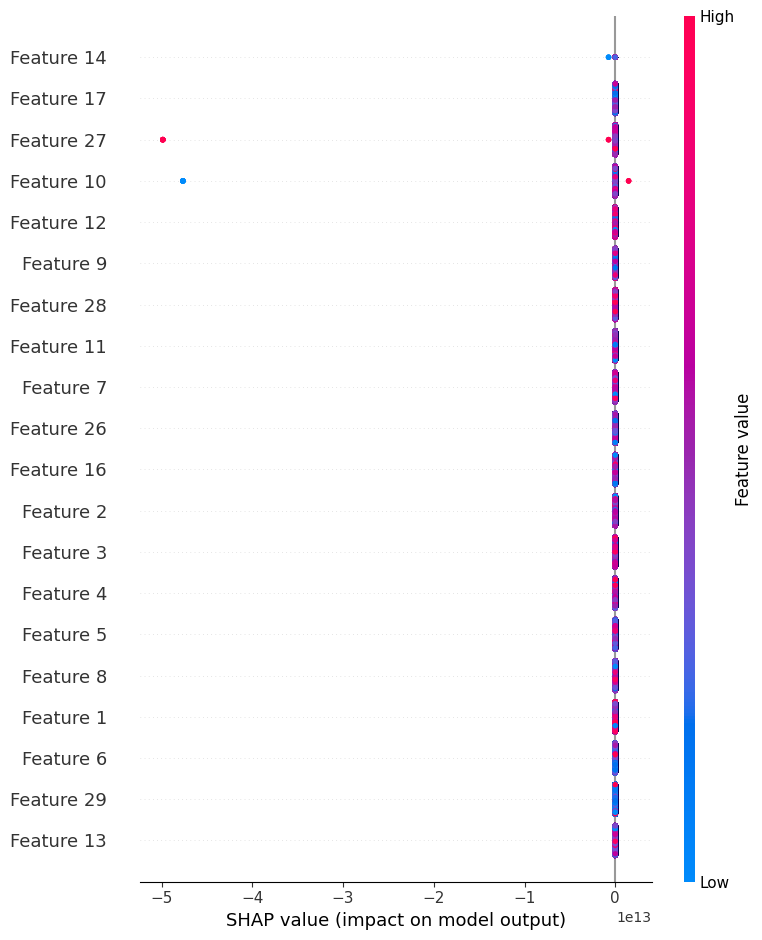

In [25]:
# Import SHAP and necessary libraries
import shap
import matplotlib.pyplot as plt

# Assuming your credit card model and training data are already available
# Example usage (with the GradientBoostingClassifier model)

# 1. Explain the model's predictions using SHAP
explainer = shap.Explainer(creditcard_model, X_creditcard_train_imputed)
shap_values = explainer(X_creditcard_test_imputed)

# 2. Plot the SHAP summary plot
shap.summary_plot(shap_values, X_creditcard_test_imputed)

# 3. Display the plot
plt.show()


 99%|===================| 56516/56962 [01:06<00:00]        C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:664: RuntimeWarning: invalid value encountered in divide
  if np.max(diff / (np.abs(sum_val) + 1e-2)) > 1e-2:
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:674: RuntimeWarning: invalid value encountered in divide
  quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:674: RuntimeWarning: invalid value encountered in subtract
  quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))


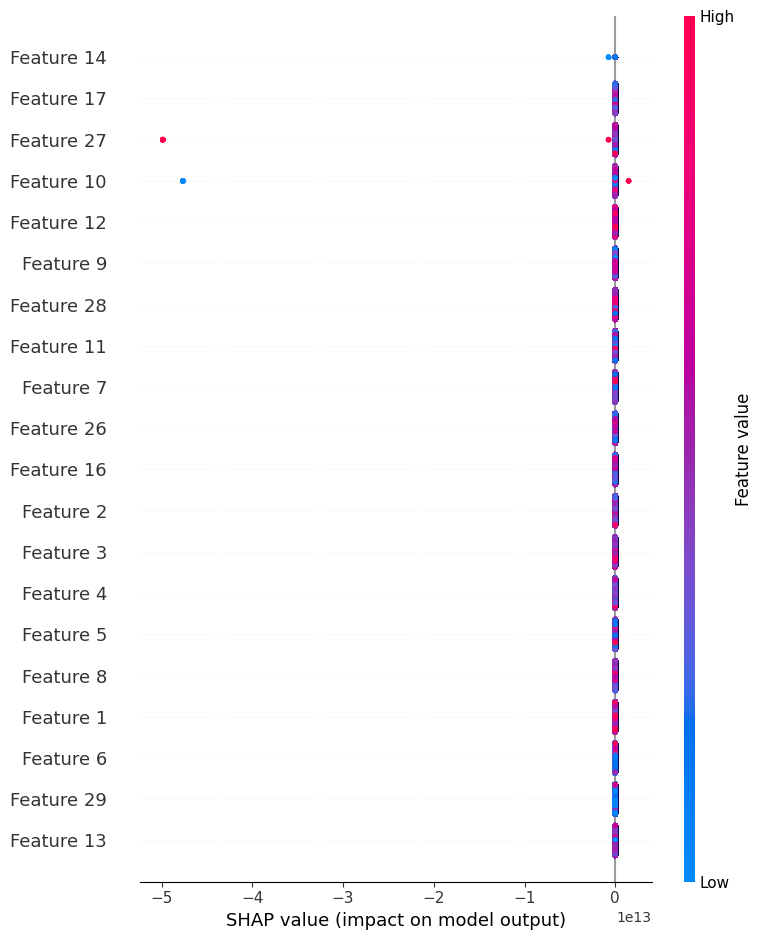

IndexError: invalid index to scalar variable.

In [27]:
# Import SHAP and necessary libraries
import shap
import matplotlib.pyplot as plt

# Assuming your credit card model and test data are already available

# 1. Explain the model's predictions using SHAP
explainer = shap.Explainer(creditcard_model, X_creditcard_train_imputed)
shap_values = explainer(X_creditcard_test_imputed)

# 2. SHAP Summary Plot
shap.summary_plot(shap_values, X_creditcard_test_imputed)
plt.show()

# 3. SHAP Force Plot for a single prediction (e.g., first test instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_creditcard_test_imputed.iloc[0,:], matplotlib=True)
plt.show()

# 4. SHAP Dependence Plot for a specific feature (e.g., 'Amount')
shap.dependence_plot("Amount", shap_values[1], X_creditcard_test_imputed)
plt.show()


Training data shape: (227845, 30)


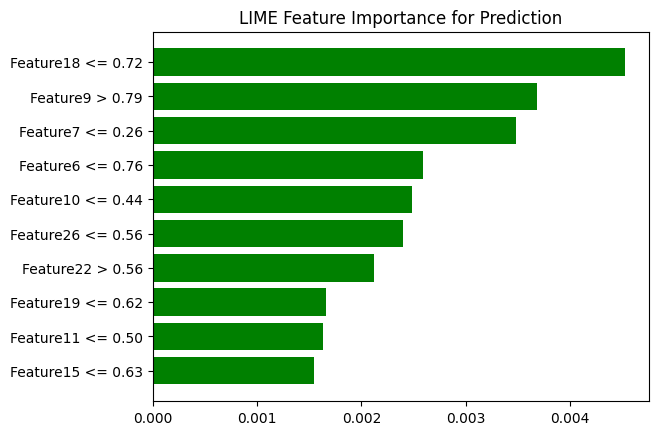

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime import lime_tabular

# Assuming X_creditcard_train_imputed is a DataFrame or a NumPy array
# Check the shape of the training data
print(f"Training data shape: {X_creditcard_train_imputed.shape}")  # Check number of features

# If X_creditcard_train_imputed is a DataFrame, extract feature names
if isinstance(X_creditcard_train_imputed, pd.DataFrame):
    feature_names = X_creditcard_train_imputed.columns.tolist()
    X_creditcard_train_imputed = X_creditcard_train_imputed.values  # Convert to NumPy array for LIME
else:
    # Manually define feature names if using a NumPy array
    # Ensure this list has the same number of items as features in your data
    feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 
                     'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 
                     'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15',
                     'Feature16', 'Feature17', 'Feature18', 'Feature19', 'Feature20', 
                     'Feature21', 'Feature22', 'Feature23', 'Feature24', 'Feature25', 
                     'Feature26', 'Feature27', 'Feature28', 'Feature29', 'Feature30']

# Ensure feature_names matches the number of features in your training data
num_features = X_creditcard_train_imputed.shape[1]
if len(feature_names) != num_features:
    raise ValueError(f"Number of features in feature_names ({len(feature_names)}) does not match training data ({num_features}).")

# 1. Create LIME Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_creditcard_train_imputed,  # Use the training data directly
    feature_names=feature_names,  # Provide the feature names
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# 2. Explain a Single Prediction (e.g., the first test sample)
i = 0  # Index of the test sample you want to explain
exp = explainer.explain_instance(
    data_row=X_creditcard_test_imputed[i],  # Use the ith test sample
    predict_fn=creditcard_model.predict_proba  # Use the model's prediction function
)

# 3. Feature Importance Plot
# Display the explanation as a bar chart
exp.as_pyplot_figure()
plt.title("LIME Feature Importance for Prediction")
plt.show()
